### <h1 align="center">CPSC 4830</h1>
<h2 align="center">MIDTERM</h2>
<h2 align="center">TIME - 2 HR 30 MIN</h2>
<h2 align="center">START TIME - 3.30 PM, END TIME - 6.00 PM</h2>
<h2 align="center">MAX MARKS - 20</h2>

<h2 align="center">All work must be completed in this file and Submit the resulting .ipynb in D2L</h2>

<h2 align="center"> Absolutely No Collaboration. Solutions with 90% and above similarity would be investigated further for possible plagiarism and cheating. If found guilty, then collobarators would be assigned a grade of 0 without any grades even for non cheated part.</h2>


### Q1. The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

### Out of the 5572 sets of sms messages, approximately 20% of the messages have been trimmed and kept aside for Evaluating your model by the Instructor. You only have 4458 rows to build your model. Rest will be used by the instructor as a blind evaluation of your model. This data is not provided to you.

### Use this dataset to build a prediction model as follows that will accurately classify which texts are spam? 

### Use Logistic Regression with L2 Regularisation and CV (K=3) (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. [10 Marks]

In [18]:
# Start Here for Q1

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
spam = pd.read_csv("spamhamtrain.csv")
spam

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
...,...,...
4452,ham,K:)k:)good:)study well.
4453,ham,"Chinatown got porridge, claypot rice, yam cake..."
4454,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
4455,ham,Tell me whos this pls:-)


In [6]:
spam['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
spam['Message'].unique()

array(["K I'm leaving soon, be there a little after 9",
       'No. Yes please. Been swimming?', 'It took Mr owl 3 licks', ...,
       'Hmm... Dunno leh, mayb a bag 4 goigng out dat is not too small. Or jus anything except perfume, smth dat i can keep.',
       'Tell me whos this pls:-)',
       'You are gorgeous! keep those pix cumming :) thank you!'],
      dtype=object)

In [9]:
spam.nunique()

Category       2
Message     4157
dtype: int64

In [10]:
spam.isnull().values.any()

False

In [12]:
spam.describe

<bound method NDFrame.describe of      Category                                            Message
0         ham      K I'm leaving soon, be there a little after 9
1         ham                     No. Yes please. Been swimming?
2         ham                             It took Mr owl 3 licks
3         ham  Its going good...no problem..but still need li...
4         ham  K.. I yan jiu liao... Sat we can go 4 bugis vi...
...       ...                                                ...
4452      ham                            K:)k:)good:)study well.
4453      ham  Chinatown got porridge, claypot rice, yam cake...
4454      ham  Hmm... Dunno leh, mayb a bag 4 goigng out dat ...
4455      ham                           Tell me whos this pls:-)
4456      ham  You are gorgeous! keep those pix cumming :) th...

[4457 rows x 2 columns]>

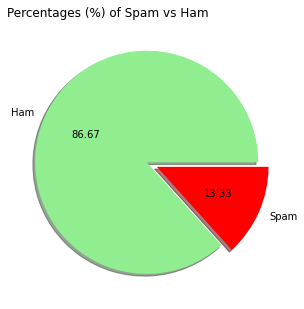

In [14]:
plt.figure("figsize", (5,9))
plt.title("Percentages (%) of Spam vs Ham", color="k", loc="left", )
plt.pie(spam.Category.value_counts(), labels=["Ham","Spam"], colors=[ "#90ee90","red"], autopct="%0.2f", explode=(0, 0.1), shadow=True)
plt.show()

In [15]:
spam.duplicated().sum()

300

In [16]:
spam = spam.drop_duplicates(keep='first')

In [18]:
#Converting Category into 0 and 1
spam['Category'] = pd.factorize(spam.Category)[0]
spam

,Category,Message
0,0,"K I'm leaving soon, be there a little after 9"
1,0,No. Yes please. Been swimming?
2,0,It took Mr owl 3 licks
3,0,Its going good...no problem..but still need li...
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...
...,...,...
4452,0,K:)k:)good:)study well.
4453,0,"Chinatown got porridge, claypot rice, yam cake..."
4454,0,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
4455,0,Tell me whos this pls:-)


In [23]:
import nltk
!pip install nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenwhang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
spam['number of char'] = spam['Message'].apply(len)
spam.head()

,Category,Message,length,number of char
0,0,"K I'm leaving soon, be there a little after 9",45,45
1,0,No. Yes please. Been swimming?,30,30
2,0,It took Mr owl 3 licks,22,22
3,0,Its going good...no problem..but still need li...,102,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,155


In [30]:
spam = spam.drop('length', 1)

In [31]:
spam

,Category,Message,number of char
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need li...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155
...,...,...,...
4452,0,K:)k:)good:)study well.,23
4453,0,"Chinatown got porridge, claypot rice, yam cake...",131
4454,0,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",116
4455,0,Tell me whos this pls:-),24


In [40]:
spam['Message'] = spam['Message'].str.replace(r'[^\w\s]+', '')
spam

,Category,Message,number of char
0,0,K Im leaving soon be there a little after 9,45
1,0,No Yes please Been swimming,30
2,0,It took Mr owl 3 licks,22
3,0,Its going goodno problembut still need little ...,102
4,0,K I yan jiu liao Sat we can go 4 bugis vill on...,155
...,...,...,...
4452,0,Kkgoodstudy well,23
4453,0,Chinatown got porridge claypot rice yam cake f...,131
4454,0,Hmm Dunno leh mayb a bag 4 goigng out dat is n...,116
4455,0,Tell me whos this pls,24


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spam_vectorizer = vectorizer.fit_transform(spam['Message'])

In [42]:
print(spam_vectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
print(vectorizer.get_feature_names())

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '0870141701216', '087

In [44]:
spam_vectorizer.shape

(4157, 8385)

In [45]:
X = spam_vectorizer
y = spam['Category']

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
#Logistic Regression with Ridge penalty
model = LogisticRegression(C=0.001, penalty="l2", max_iter=100)

In [68]:
model.fit(X, y)

LogisticRegression(C=0.001)

In [69]:
y_pred = model.predict(spam_vectorizer)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
model.score(X, y)

0.8744286745248978

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
 print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3635
           1       0.00      0.00      0.00       522

    accuracy                           0.87      4157
   macro avg       0.44      0.50      0.47      4157
weighted avg       0.76      0.87      0.82      4157



### Q2. Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. 

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>


### Use PCA to find the principle components of the given data. Find the retained variance of the data and how much is lost due to applying PCA. If required drop the Null values in the column and get rid of unnecessary categorical columns before applying PCA. 
### Explain each step including why some columns are to be dropped before applying PCA. Scaling is necessary and must be applied here.

### [10 Marks]

In [20]:
# Start Here for Q2